<a href="https://colab.research.google.com/github/HenriqueCCdA/EstudoDoFEniCS/blob/main/Notebooks/ft01_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando o FeniCS

In [1]:
# FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2021-08-05 21:46:58--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1946 (1.9K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   1.90K  --.-KB/s    in 0s      

2021-08-05 21:46:58 (31.8 MB/s) - ‘/tmp/fenics-install.sh’ saved [1946/1946]

+ PYBIND11_INSTALL_SCRIPT_PATH=https://fem-on-colab.github.io/releases/pybind11-install.sh
+ [[ https://fem-on-colab.github.io/releases/pybind11-install.sh == http* ]]
+ wget https://fem-on-colab.github.io/releases/pybind11-install.sh -O /tmp/pybind11-install.sh
--2021-08-05 21:46:58--  https://fem-on-colab.github.io/releases/pybind11-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.1

#Importando

In [2]:
from fenics import *

# Motando o problema

* Equação de possion:

\begin{align}
\nabla^2 u(\mathbf{x}) = f(\mathbf{x})\\
u(\mathbf{x}) = u_D(\mathbf{x})
\end{align}

* condição de contorno:

\begin{align}
u(\mathbf{x}) = u_D(\mathbf{x})
\end{align}

In [24]:
# Criando a melha
mesh = UnitSquareMesh(8, 8)

# Definindo funcoes de espaco
V = FunctionSpace(mesh, 'P', 1)

# Definindo condicoes de contorno
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Definindo o problema variacional

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Calculo da solucao
u = Function(V)
solve(a == L, u, bc)

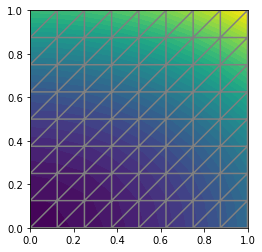

In [25]:
# Plota a solucao e a malha

plot(u)
plot(mesh)

In [26]:
# Arquivo para o ParaView
vtkfile = File('poisson/solution.pvd')
vtkfile << u

In [27]:
# Calcula o erro da norma L2
error_L2 = errornorm(u_D, u, 'L2')

# Calcula o erro maximo nos vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np

print(f'erro_L2  = {error_L2}')
print(f'erro_max = {error_max}')

erro_L2  = 0.008235098073354749
erro_max = 1.3322676295501878e-15


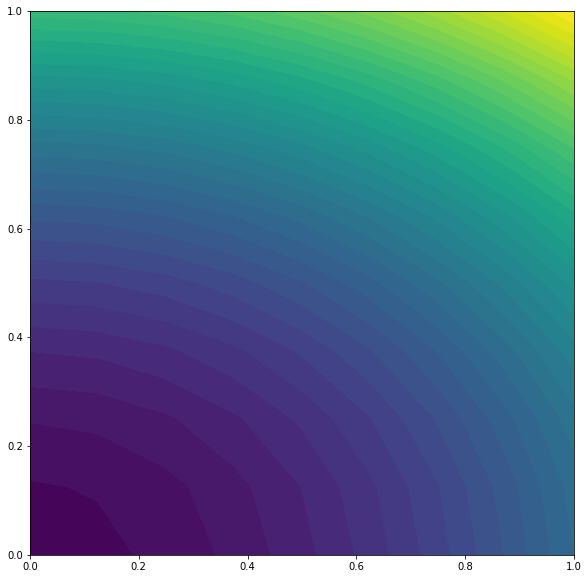

In [33]:
# Hold plot
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 10)

plot(u)
plt.show()